In [1]:
import pandas as pd
import glob
import numpy as np
import pandas_profiling


In [2]:
df1 = pd.read_csv('/Users/ericchiyembekeza/Desktop/berlin-airbnb-data/reviews.csv')
df2 = pd.read_csv('/Users/ericchiyembekeza/Desktop/berlin-airbnb-data/neighbourhoods.csv')
df3 = pd.read_csv('/Users/ericchiyembekeza/Desktop/berlin-airbnb-data/listings.csv')
df4 = pd.read_csv('/Users/ericchiyembekeza/Desktop/berlin-airbnb-data/calendar_summary.csv')
df5 = pd.read_csv('/Users/ericchiyembekeza/Desktop/berlin-airbnb-data/reviews_summary.csv')
df6 = pd.read_csv('/Users/ericchiyembekeza/Desktop/berlin-airbnb-data/listings_summary.csv')


In [3]:
df6.head(100)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75
5,9991,https://www.airbnb.com/rooms/9991,20181107122246,2018-11-07,Geourgeous flat - outstanding views,4 bedroom with very large windows and outstand...,"THE APPARTMENT - 4 bedroom (US, Germany: 5 roo...",4 bedroom with very large windows and outstand...,none,Prenzlauer Berg is an amazing neighbourhood wh...,...,t,03/Z/RA/003410-18,NaN,f,f,strict_14_with_grace_period,f,f,1,0.15
6,14325,https://www.airbnb.com/rooms/14325,20181107122246,2018-11-07,Apartment in Prenzlauer Berg,The apartment is located on the upper second f...,The apartment is located on the south-facing s...,The apartment is located on the upper second f...,none,NaN,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,3,0.23
7,16401,https://www.airbnb.com/rooms/16401,20181107122246,2018-11-07,APARTMENT TO RENT,NaN,Hello future guests! We want to rent our cute ...,Hello future guests! We want to rent our cute ...,none,NaN,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,NaN
8,16644,https://www.airbnb.com/rooms/16644,20181107122246,2018-11-07,In the Heart of Berlin - Kreuzberg,Light and sunny 2-Room-turn of the century-fla...,Rent in the heart of Berlin - Kreuzberg Newly ...,Light and sunny 2-Room-turn of the century-fla...,none,Our Part of Kreuzberg is just the best. Good v...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,t,2,0.47
9,17409,https://www.airbnb.com/rooms/17409,20181107122246,2018-11-07,Downtown Above The Roofs In Berlin,The 25 sqm room is located in the heart of Ber...,A 25 sqm room in the heart of Berlin. Many pla...,The 25 sqm room is located in the heart of Ber...,none,You are in the heart of the former East-Berlin...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,2.83


In [4]:
del_features = ['id','requires_license','listing_url','summary','host_url','thumbnail_url','picture_url','xl_picture_url','host_thumbnail_url','host_picture_url','access','availability_60','availability_90','cleaning_fee','country','country_code','experiences_offered','first_review','has_availability','host_about','host_acceptance_rate','host_name','host_neighbourhood','host_response_rate','host_response_time','host_total_listings_count','house_rules','interaction','is_business_travel_ready','jurisdiction_names','last_review','last_scraped','license','medium_url','monthly_price','name','neighborhood_overview','notes','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value','reviews_per_month','scrape_id','security_deposit','space','square_feet','transit','weekly_price']

In [5]:
df6 = df6.drop(columns=del_features)

In [6]:
df6.head()

,description,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,...,calendar_updated,availability_30,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,Great location! 30 of 75 sq meters. This wood...,2217,2008-08-18,"Key Biscayne, Florida, United States",t,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",...,3 months ago,0,141,2018-11-07,118,f,strict_14_with_grace_period,f,f,4
1,In the summertime we are spending most of our ...,2986,2008-09-16,"Berlin, Berlin, Germany",f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",...,7 weeks ago,0,0,2018-11-07,6,f,flexible,f,f,1
2,This beautiful first floor apartment is situa...,3718,2008-10-19,"Coledale, New South Wales, Australia",f,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",...,a week ago,0,220,2018-11-07,143,t,strict_14_with_grace_period,f,f,1
3,First of all: I prefer short-notice bookings. ...,4108,2008-11-07,"Berlin, Berlin, Germany",f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",...,4 weeks ago,0,297,2018-11-07,25,f,strict_14_with_grace_period,f,f,1
4,Cozy and large room in the beautiful district ...,17391,2009-05-16,"Berlin, Berlin, Germany",t,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",...,3 days ago,15,26,2018-11-07,197,f,moderate,f,f,1


In [7]:
df6.columns

Index(['description', 'host_id', 'host_since', 'host_location',
       'host_is_superhost', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_365', 'calendar_last_scraped',
       'number_of_reviews', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count'],
      dtype='object')

In [19]:
df6['price'] = df6['price'].apply(lambda x: x.strip('$'))
df6['price'] = df6['price'].apply(lambda x: x.strip('.00'))

In [20]:
df6['price'] = df6['price'].str.replace(',', '')

In [21]:
df6['price'] = pd.to_numeric(df6['price'])

In [ ]:
df6_report = df6.profile_report()

In [ ]:
df6_report.to_file(output_file="airbnb_report.html")

In [ ]:
df6 = pd.read_csv('/Users/ericchiyembekeza/Desktop/berlin-airbnb-data/listings_summary.csv')

In [ ]:
df6.columns

In [ ]:
def true_false(x):
    tf_list = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified','requires_license',
              'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
    for i in tf_list:
        x[i] == 't'
    return true_false(x)

In [ ]:
def replace_tf(x):
    tf_list = ['host_is_superhost', 'host_has_profile_pic','host_identity_verified',
              'instant_bookable','require_guest_profile_picture','require_guest_phone_verification']
    for i in tf_list:
        return x[i].replace({'f': False, 't': True}) 

In [ ]:
df6.drop(del_features)

In [8]:
df6['host_is_superhost']= df6['host_is_superhost'].replace({'f': False, 't': True})
df6['host_has_profile_pic']= df6['host_has_profile_pic'].replace({'f': False, 't': True})
df6['host_identity_verified']= df6['host_identity_verified'].replace({'f': False, 't': True})
#df6['has_availability']= df6['has_availability'].replace({'f': False, 't': True})
df6['instant_bookable']= df6['instant_bookable'].replace({'f': False, 't': True})
#df6['is_business_travel_ready']= df6['is_business_travel_ready'].replace({'f': False, 't': True})
df6['require_guest_profile_picture']= df6['require_guest_profile_picture'].replace({'f': False, 't': True})
df6['require_guest_phone_verification']= df6['require_guest_phone_verification'].replace({'f': False, 't': True})

In [9]:
df6.head(50)

,description,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,...,calendar_updated,availability_30,availability_365,calendar_last_scraped,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,Great location! 30 of 75 sq meters. This wood...,2217,2008-08-18,"Key Biscayne, Florida, United States",True,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,True,"Berlin, Berlin, Germany",...,3 months ago,0,141,2018-11-07,118,False,strict_14_with_grace_period,False,False,4
1,In the summertime we are spending most of our ...,2986,2008-09-16,"Berlin, Berlin, Germany",False,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,"Berlin, Berlin, Germany",...,7 weeks ago,0,0,2018-11-07,6,False,flexible,False,False,1
2,This beautiful first floor apartment is situa...,3718,2008-10-19,"Coledale, New South Wales, Australia",False,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",True,True,"Berlin, Berlin, Germany",...,a week ago,0,220,2018-11-07,143,True,strict_14_with_grace_period,False,False,1
3,First of all: I prefer short-notice bookings. ...,4108,2008-11-07,"Berlin, Berlin, Germany",False,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,"Berlin, Berlin, Germany",...,4 weeks ago,0,297,2018-11-07,25,False,strict_14_with_grace_period,False,False,1
4,Cozy and large room in the beautiful district ...,17391,2009-05-16,"Berlin, Berlin, Germany",True,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,"Berlin, Berlin, Germany",...,3 days ago,15,26,2018-11-07,197,False,moderate,False,False,1
5,4 bedroom with very large windows and outstand...,33852,2009-08-25,"Berlin, Berlin, Germany",False,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,"Berlin, Berlin, Germany",...,2 weeks ago,0,137,2018-11-07,6,False,strict_14_with_grace_period,False,False,1
6,The apartment is located on the upper second f...,55531,2009-11-18,"Berlin, Berlin, Germany",False,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",True,False,"Berlin, Berlin, Germany",...,today,0,129,2018-11-07,23,False,strict_14_with_grace_period,False,False,3
7,Hello future guests! We want to rent our cute ...,59666,2009-12-03,"Berlin, Berlin, Germany",False,1.0,"['email', 'phone', 'facebook', 'jumio', 'offli...",True,True,"Berlin, Berlin, Germany",...,never,30,365,2018-11-07,0,False,strict_14_with_grace_period,False,False,1
8,Light and sunny 2-Room-turn of the century-fla...,64696,2009-12-20,"Santa Cruz, California, United States",False,4.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,False,"Berlin, Berlin, Germany",...,2 months ago,0,159,2018-11-07,48,False,strict_14_with_grace_period,False,True,2
9,The 25 sqm room is located in the heart of Ber...,67590,2010-01-04,"Berlin, Berlin, Germany",True,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",True,True,"Berlin, Berlin, Germany",...,a week ago,8,42,2018-11-07,279,False,strict_14_with_grace_period,False,False,1


In [ ]:
df6['calendar_last_scraped'].count

In [10]:
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [22]:
df6.describe()

,host_id,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,calculated_host_listings_count
count,2.255200e+04,22526.000000,22552.000000,22552.000000,22552.000000,22520.000000,22534.000000,22512.000000,22544.000000,22552.000000,22552.000000,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000
mean,5.403355e+07,2.330685,52.509824,13.406107,2.637460,1.092695,1.161134,1.620558,35.850337,1.332121,7.157059,1.030505e+05,4.944173,79.852829,17.840679,1.918233
std,5.816290e+07,19.947823,0.030825,0.057964,1.510548,0.329894,0.646156,1.174840,50.031772,0.835034,40.665073,9.640519e+06,8.677395,119.368162,36.769624,3.667257
min,2.217000e+03,0.000000,52.345803,13.103557,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,9.240002e+06,1.000000,52.489065,13.375411,2.000000,1.000000,1.000000,1.000000,6.000000,1.000000,2.000000,2.000000e+01,0.000000,0.000000,1.000000,1.000000
50%,3.126711e+07,1.000000,52.509079,13.416779,2.000000,1.000000,1.000000,1.000000,27.000000,1.000000,2.000000,1.124000e+03,0.000000,4.000000,5.000000,1.000000
75%,8.067518e+07,2.000000,52.532669,13.439259,3.000000,1.000000,1.000000,2.000000,49.000000,1.000000,4.000000,1.125000e+03,6.000000,129.000000,16.000000,1.000000
max,2.245081e+08,1676.000000,52.651670,13.757642,16.000000,8.500000,12.000000,22.000000,2228.000000,16.000000,5000.000000,1.000000e+09,30.000000,365.000000,498.000000,45.000000


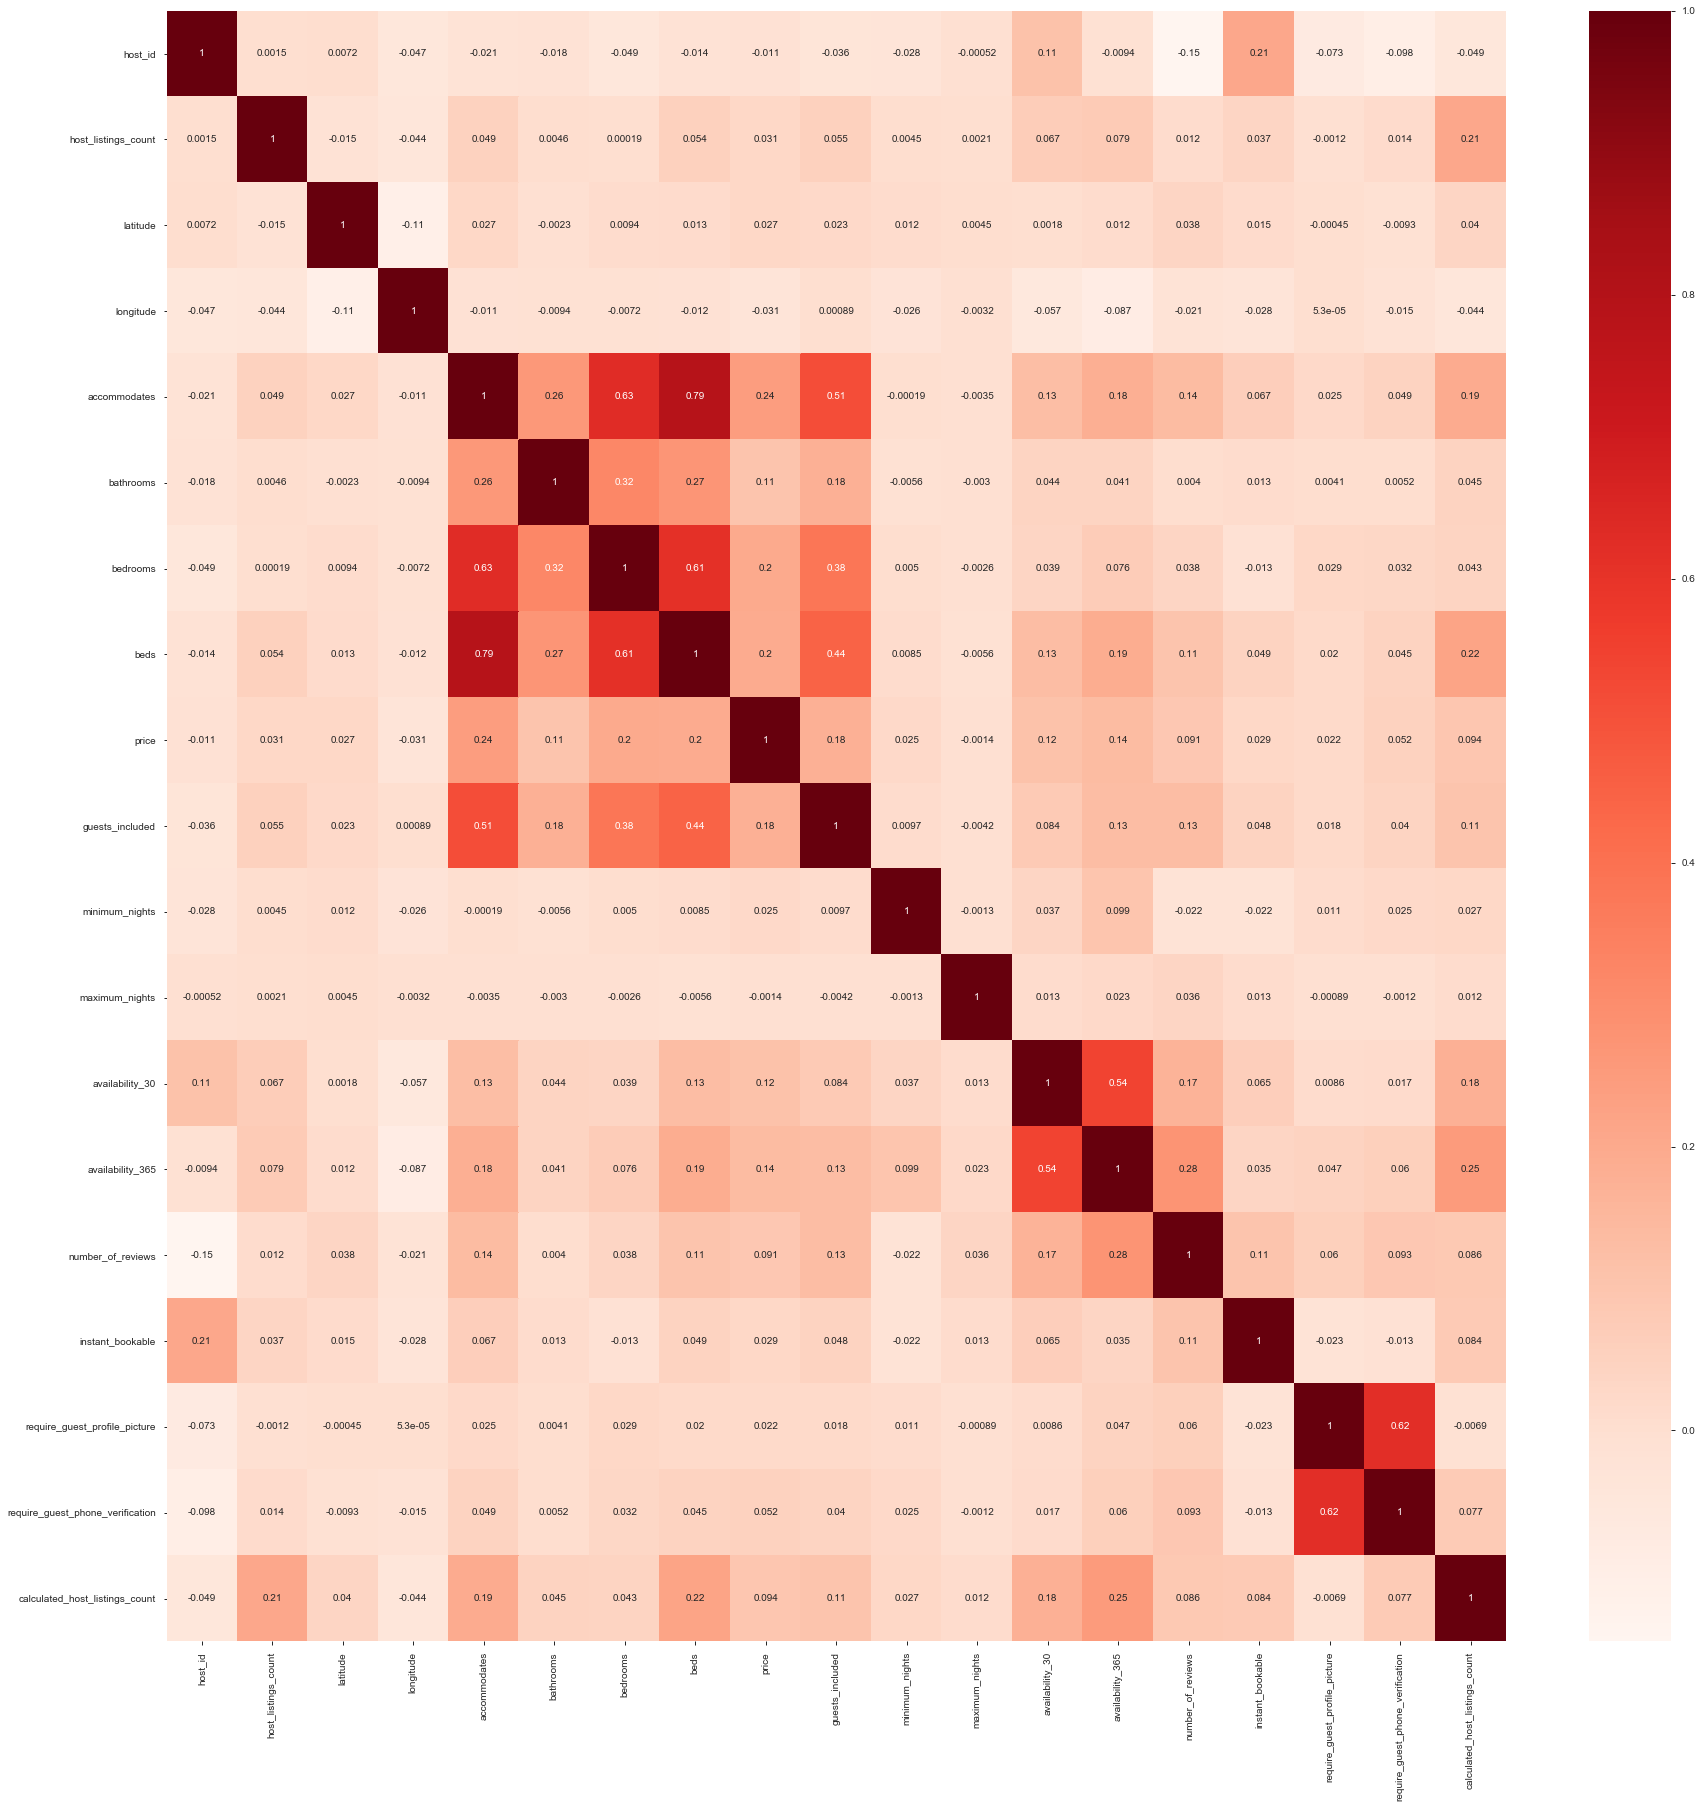

In [23]:
plt.figure(figsize=(30,30))
cor = df6.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
df6.plot(x='accommodates', y='beds', style='o')  
plt.title('Accommodates vs Beds')  
plt.xlabel('Accommodates')  
plt.ylabel('Beds')  
plt.show()

Include price from the listing df to the listing reviews df

In [27]:
df6 = df6.fillna(method = 'ffill')

In [28]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def wrangle(X):
    X = X.copy()

    return X

# Read data
trainval = df6

# Split into train & validation sets
# All rows for a given tube_assembly_id should go in either train or validation
train_rentals, val_rentals = train_test_split(trainval, random_state=42)

# Wrangle train, validation, and test sets
train = wrangle(train_rentals)
val = wrangle(val_rentals)

# Arrange X matrix and y vector (log-transformed)
target = 'price'
X_train = train.drop(columns=target)
X_val = val.drop(columns=target)
y_train = train[target]
y_val = val[target]
y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)

In [29]:
# Make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit
pipeline.fit(X_train, y_train_log)

# Validate
y_pred_log = pipeline.predict(X_val)
print('Validation Error', rmse(y_val_log, y_pred_log))

Validation Error 1.080490778745386


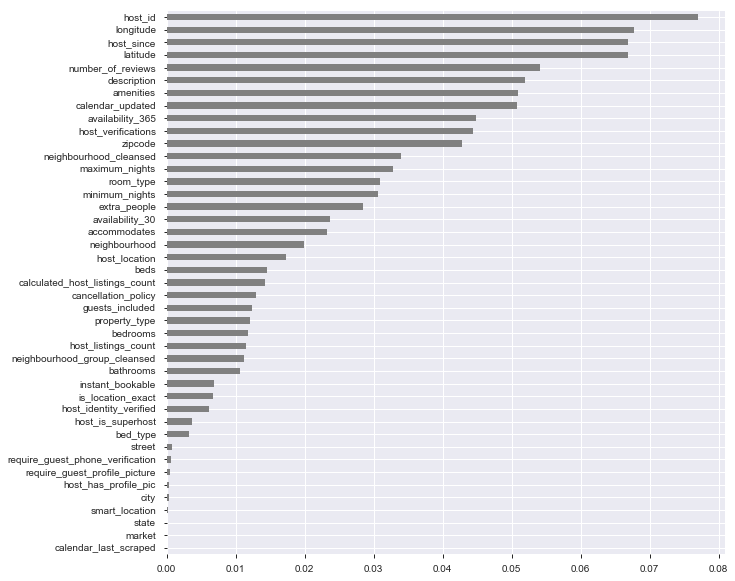

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='grey');